In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix.csv"
df = pd.read_csv(file_path)

# Definir variables de entrada con los nuevos umbrales específicos por cluster
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida (Grados Brix)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Definir funciones de membresía basadas en los valores de los clusters
ALLSKY_KT['bajo'] = fuzz.trapmf(ALLSKY_KT.universe, [0.49, 0.49, 0.52, 0.59])
ALLSKY_KT['medio'] = fuzz.trapmf(ALLSKY_KT.universe, [0.52, 0.59, 0.62, 0.66])
ALLSKY_KT['alto'] = fuzz.trapmf(ALLSKY_KT.universe, [0.62, 0.66, 0.72, 0.73])

QV2M['bajo'] = fuzz.trapmf(QV2M.universe, [8.2, 8.2, 9.5, 10.5])
QV2M['medio'] = fuzz.trapmf(QV2M.universe, [9.5, 10.5, 13.0, 14.0])
QV2M['alto'] = fuzz.trapmf(QV2M.universe, [13.0, 14.0, 15.2, 15.3])

T2MDEW['bajo'] = fuzz.trapmf(T2MDEW.universe, [8.5, 8.5, 10.0, 12.0])
T2MDEW['medio'] = fuzz.trapmf(T2MDEW.universe, [10.0, 12.0, 15.8, 17.0])
T2MDEW['alto'] = fuzz.trapmf(T2MDEW.universe, [15.8, 17.0, 18.5, 18.6])

PRECTOTCORR_SUM['bajo'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [0.4, 0.4, 50, 100])
PRECTOTCORR_SUM['medio'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [50, 100, 168, 180])
PRECTOTCORR_SUM['alto'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [168, 180, 221, 221.6])

PRECTOTCORR['bajo'] = fuzz.trapmf(PRECTOTCORR.universe, [0.01, 0.01, 1.5, 3.0])
PRECTOTCORR['medio'] = fuzz.trapmf(PRECTOTCORR.universe, [1.5, 3.0, 5.5, 6.0])
PRECTOTCORR['alto'] = fuzz.trapmf(PRECTOTCORR.universe, [5.5, 6.0, 7.3, 7.3])

# Definir funciones de membresía para Grados Brix ajustadas
Grados_Brix['bajo'] = fuzz.trimf(Grados_Brix.universe, [18, 22, 26])
Grados_Brix['medio'] = fuzz.trimf(Grados_Brix.universe, [24, 27, 30])
Grados_Brix['alto'] = fuzz.trimf(Grados_Brix.universe, [28, 32, 35])

# Definir nuevas reglas basadas en los umbrales específicos
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso optimizado
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
    brix_sim.input['QV2M'] = row['QV2M']
    brix_sim.input['T2MDEW'] = row['T2MDEW']
    brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
    brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']
    brix_sim.compute()
    predictions_new.append(brix_sim.output['Grados_Brix'])

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Optimizada"] = predictions_new

# Guardar el archivo con las nuevas predicciones optimizadas
df.to_csv("POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram.csv", index=False)
print("Modelo optimizado ejecutado correctamente. Archivo guardado.")


Modelo optimizado ejecutado correctamente. Archivo guardado.


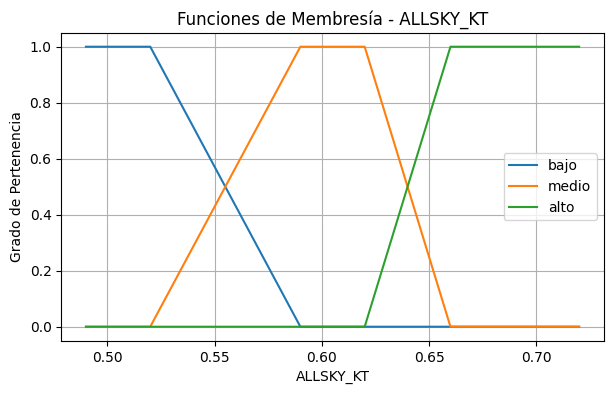

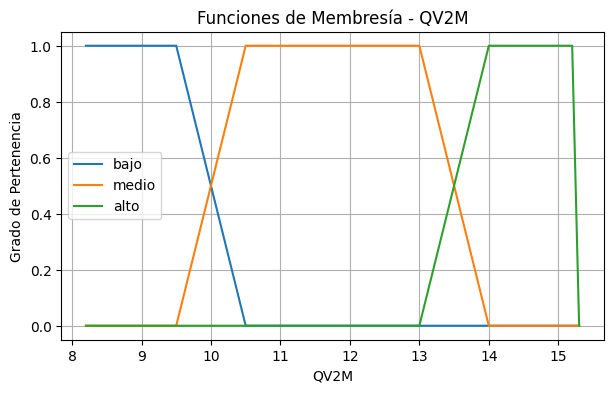

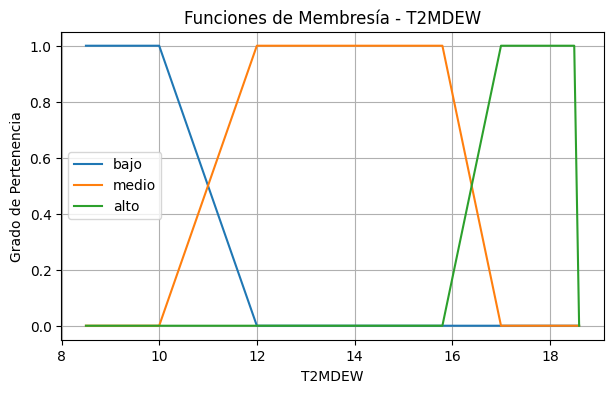

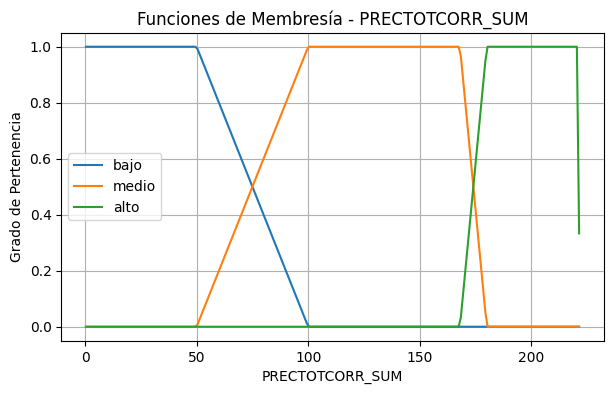

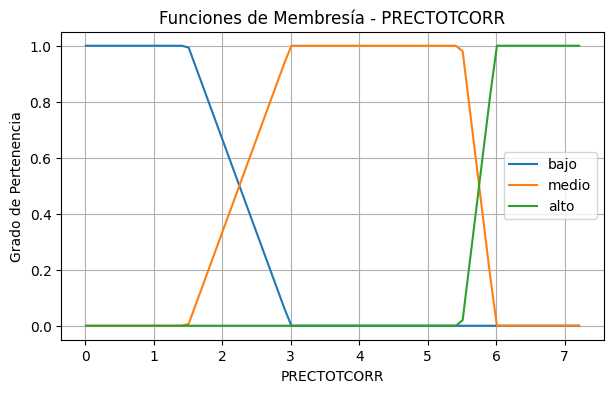

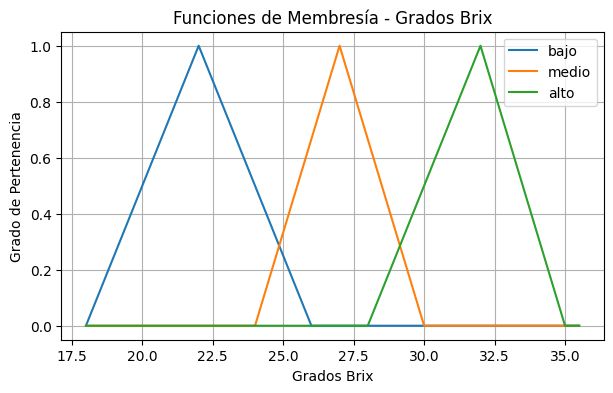

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Definir variables de entrada con los nuevos umbrales específicos por cluster
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida (Grados Brix)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Definir funciones de membresía basadas en los valores de los clusters
ALLSKY_KT['bajo'] = fuzz.trapmf(ALLSKY_KT.universe, [0.49, 0.49, 0.52, 0.59])
ALLSKY_KT['medio'] = fuzz.trapmf(ALLSKY_KT.universe, [0.52, 0.59, 0.62, 0.66])
ALLSKY_KT['alto'] = fuzz.trapmf(ALLSKY_KT.universe, [0.62, 0.66, 0.72, 0.73])

QV2M['bajo'] = fuzz.trapmf(QV2M.universe, [8.2, 8.2, 9.5, 10.5])
QV2M['medio'] = fuzz.trapmf(QV2M.universe, [9.5, 10.5, 13.0, 14.0])
QV2M['alto'] = fuzz.trapmf(QV2M.universe, [13.0, 14.0, 15.2, 15.3])

T2MDEW['bajo'] = fuzz.trapmf(T2MDEW.universe, [8.5, 8.5, 10.0, 12.0])
T2MDEW['medio'] = fuzz.trapmf(T2MDEW.universe, [10.0, 12.0, 15.8, 17.0])
T2MDEW['alto'] = fuzz.trapmf(T2MDEW.universe, [15.8, 17.0, 18.5, 18.6])

PRECTOTCORR_SUM['bajo'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [0.4, 0.4, 50, 100])
PRECTOTCORR_SUM['medio'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [50, 100, 168, 180])
PRECTOTCORR_SUM['alto'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [168, 180, 221, 221.6])

PRECTOTCORR['bajo'] = fuzz.trapmf(PRECTOTCORR.universe, [0.01, 0.01, 1.5, 3.0])
PRECTOTCORR['medio'] = fuzz.trapmf(PRECTOTCORR.universe, [1.5, 3.0, 5.5, 6.0])
PRECTOTCORR['alto'] = fuzz.trapmf(PRECTOTCORR.universe, [5.5, 6.0, 7.3, 7.3])

# Definir funciones de membresía para Grados Brix ajustadas
Grados_Brix['bajo'] = fuzz.trimf(Grados_Brix.universe, [18, 22, 26])
Grados_Brix['medio'] = fuzz.trimf(Grados_Brix.universe, [24, 27, 30])
Grados_Brix['alto'] = fuzz.trimf(Grados_Brix.universe, [28, 32, 35])

# Lista de variables y sus nombres legibles
variables = {
    "ALLSKY_KT": ALLSKY_KT,
    "QV2M": QV2M,
    "T2MDEW": T2MDEW,
    "PRECTOTCORR_SUM": PRECTOTCORR_SUM,
    "PRECTOTCORR": PRECTOTCORR,
    "Grados Brix": Grados_Brix
}

# Generar las gráficas de las funciones de membresía
for var_name, var in variables.items():
    plt.figure(figsize=(7, 4))
    for label in var.terms:
        plt.plot(var.universe, var[label].mf, label=label)
    plt.title(f"Funciones de Membresía - {var_name}")
    plt.xlabel(var_name)
    plt.ylabel("Grado de Pertenencia")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import os

# ===================== CARGA DEL ARCHIVO =====================
# Subir archivo CSV
uploaded = files.upload()

# Obtener el nombre exacto del archivo subido
file_name = list(uploaded.keys())[0]
print(f"Archivo cargado: {file_name}")

# Leer el archivo CSV
df = pd.read_csv(file_name)

# ===================== VISUALIZAR DATOS =====================
# Mostrar las primeras filas del dataset para verificar las columnas
print("Primeras filas del archivo:")
print(df.head())

# ===================== PREPARAR DATOS =====================
# Extraer variables relevantes
X = df["Grados Brix"]
Y = df["Predicción Grados Brix Optimizada"]
Z_real = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
Z_pred = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# ===================== GENERAR GRÁFICAS 3D =====================
fig = plt.figure(figsize=(12, 6))

# Gráfico de cosecha real
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(X, Y, Z_real, cmap="viridis", alpha=0.7)
ax1.set_title("Superficie de Cosecha Real")
ax1.set_xlabel("Grados Brix")
ax1.set_ylabel("Predicción Grados Brix")
ax1.set_zlabel("Cosecha (1 = Sí, 0 = No)")

# Gráfico de cosecha optimizada
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(X, Y, Z_pred, cmap="plasma", alpha=0.7)
ax2.set_title("Superficie de Cosecha Predicha")
ax2.set_xlabel("Grados Brix")
ax2.set_ylabel("Predicción Grados Brix")
ax2.set_zlabel("Cosecha (1 = Sí, 0 = No)")

# Mostrar gráfico
plt.tight_layout()
plt.show()


Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram.csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram (1).csv
Archivo cargado: POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram (1).csv
Primeras filas del archivo:
   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016        1             5   0.673333   8.370000   8.770000   
1  2016        2             6   0.630000  10.553333  12.063333   
2  2016        3             7   0.516667  14.836667  18.100000   
3  2016        4             8   0.616667  12.340000  14.973333   
4  2017        1             9   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           28   
3        35.170000     1.150000        0           25   
4         3.013333     0.09666

KeyError: 'Cosecha Real'

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
# Subir archivo CSV
uploaded = files.upload()

# Obtener el nombre exacto del archivo subido
file_name = list(uploaded.keys())[0]
print(f"Archivo cargado: {file_name}")

# Leer el archivo CSV
df = pd.read_csv(file_name)

# ===================== VISUALIZAR DATOS =====================
# Mostrar las primeras filas del dataset para verificar las columnas
print("Primeras filas del archivo:")
print(df.head())

# ===================== PREPARAR DATOS =====================
# Extraer variables relevantes
X = df["Grados Brix"]
Y = df["Predicción Grados Brix Optimizada"]
Z_real = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
Z_pred = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# ===================== GENERAR GRÁFICA 3D =====================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la cosecha optimizada (predicción del modelo) en "plasma" para resaltar las diferencias
ax.plot_trisurf(X, Y, Z_pred, cmap="plasma", alpha=0.7, edgecolor='none')

# Graficar la cosecha real (histórica) en "viridis" para contrastar con la optimizada
ax.plot_trisurf(X, Y, Z_real, cmap="viridis", alpha=0.5, edgecolor='none')

# Configurar etiquetas y título con mejor visibilidad
ax.set_title("Comparación de Superficies: Cosecha Real vs Cosecha Predicha", pad=20)
ax.set_xlabel("Grados Brix", labelpad=15)
ax.set_ylabel("Predicción Grados Brix", labelpad=15)
ax.set_zlabel("Cosecha (1 = Sí, 0 = No)", labelpad=20)

# Ajustar la vista para mejorar la legibilidad del eje Z
ax.view_init(elev=25, azim=-50)

# Mostrar gráfico
plt.show()


Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram.csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram (2).csv
Archivo cargado: POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trim_tram (2).csv
Primeras filas del archivo:
   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016        1             5   0.673333   8.370000   8.770000   
1  2016        2             6   0.630000  10.553333  12.063333   
2  2016        3             7   0.516667  14.836667  18.100000   
3  2016        4             8   0.616667  12.340000  14.973333   
4  2017        1             9   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           28   
3        35.170000     1.150000        0           25   
4         3.013333     0.09666

KeyError: 'Cosecha Real'

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)


Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trim_tram.csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trim_tram (1).csv

Total de muestras: 28
Errores detectados: 3
Tasa de error: 10.71%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 89.29%
Exactitud (Precision): 100.00%
Sensibilidad (Recall): 66.67%
Puntaje F1 (F1-Score): 80.00%

===== MATRIZ DE CONFUSIÓN =====
[[19  0]
 [ 3  6]]


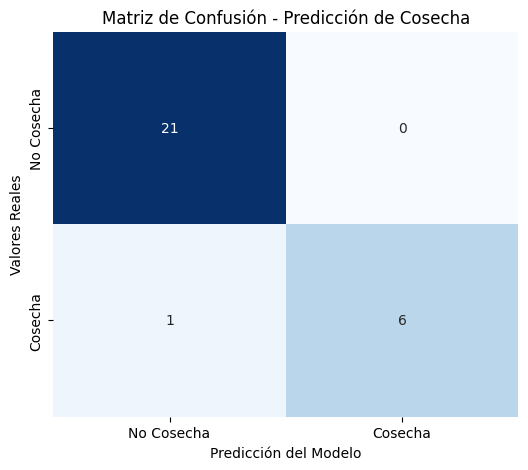

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores de la matriz de confusión
conf_matrix = np.array([[21, 0], [1, 6]])

# Definir etiquetas para los ejes
labels = ["No Cosecha", "Cosecha"]

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Configurar títulos y etiquetas
plt.title("Matriz de Confusión - Predicción de Cosecha")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valores Reales")

# Mostrar gráfico
plt.show()


In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import random
from deap import base, creator, tools, algorithms

# Cargar datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir rangos de variables de entrada y salida
var_ranges = {
    'ALLSKY_KT': (0.49, 0.73),
    'QV2M': (8.2, 15.3),
    'T2MDEW': (8.5, 18.6),
    'PRECTOTCORR_SUM': (0.4, 221.6),
    'PRECTOTCORR': (0.01, 7.3),
    'Grados_Brix': (18, 36)
}

# Función para crear funciones de membresía dinámicamente
def generate_fuzzy_sets(params, universe):
    params = sorted(params[:-1])  # Ordenar parámetros antes de usarlos
    fm_type = params[-1]

    if fm_type == 0:
        return fuzz.trimf(universe, params[:3])  # Solo usa tres valores ordenados
    elif fm_type == 1:
        return fuzz.trapmf(universe, params[:4])  # Cuatro valores ordenados
    elif fm_type == 2:
        return fuzz.gaussmf(universe, params[0], params[1])
    else:
        return fuzz.smf(universe, params[0], params[1])

# Definir función de evaluación
def evaluate(individual):
    antecedents = {}
    consequent = {}

    idx = 0
    for var in var_ranges.keys():
        if var != 'Grados_Brix':  # Variables de entrada
            antecedents[var] = ctrl.Antecedent(np.linspace(*var_ranges[var], 24), var)
            universe = antecedents[var].universe  # Obtener el universo correcto
            antecedents[var]['bajo'] = generate_fuzzy_sets(individual[idx:idx+5], universe)
            antecedents[var]['medio'] = generate_fuzzy_sets(individual[idx+5:idx+10], universe)
            antecedents[var]['alto'] = generate_fuzzy_sets(individual[idx+10:idx+15], universe)
            idx += 15
        else:  # Variable de salida
            consequent[var] = ctrl.Consequent(np.linspace(*var_ranges[var], 24), var)
            universe = consequent[var].universe
            consequent[var]['bajo'] = generate_fuzzy_sets(individual[idx:idx+5], universe)
            consequent[var]['medio'] = generate_fuzzy_sets(individual[idx+5:idx+10], universe)
            consequent[var]['alto'] = generate_fuzzy_sets(individual[idx+10:idx+15], universe)
            idx += 15

    # Depuración: asegurar que todas las variables existen en `antecedents`
    print("Variables en antecedents:", antecedents.keys())

    try:
        # Definir reglas asegurando que TODAS las variables existen en `antecedents`
        rule1 = ctrl.Rule(antecedents['ALLSKY_KT']['alto'] & antecedents['QV2M']['bajo'] &
                          antecedents['T2MDEW']['bajo'] & antecedents['PRECTOTCORR_SUM']['bajo'],
                          consequent['Grados_Brix']['bajo'])
        rule2 = ctrl.Rule(antecedents['ALLSKY_KT']['medio'] & antecedents['QV2M']['medio'] &
                          antecedents['T2MDEW']['medio'] & antecedents['PRECTOTCORR_SUM']['medio'],
                          consequent['Grados_Brix']['medio'])
        rule3 = ctrl.Rule(antecedents['ALLSKY_KT']['bajo'] & antecedents['QV2M']['alto'] &
                          antecedents['T2MDEW']['alto'] & antecedents['PRECTOTCORR_SUM']['alto'],
                          consequent['Grados_Brix']['alto'])
        rule4 = ctrl.Rule(antecedents['PRECTOTCORR_SUM']['alto'] | antecedents['PRECTOTCORR']['alto'],
                          consequent['Grados_Brix']['alto'])
        rule5 = ctrl.Rule(antecedents['PRECTOTCORR_SUM']['medio'] | antecedents['PRECTOTCORR']['medio'],
                          consequent['Grados_Brix']['medio'])
        rule6 = ctrl.Rule(antecedents['PRECTOTCORR_SUM']['bajo'] | antecedents['PRECTOTCORR']['bajo'],
                          consequent['Grados_Brix']['bajo'])
    except KeyError as e:
        print(f"Error en las reglas: variable no encontrada {e}")
        return (0,)  # Penalización por errores

    # Crear sistema difuso
    brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
    brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

    # Evaluar el modelo con los datos reales
    predictions = []
    for _, row in df.iterrows():
        for var in antecedents.keys():
            if var in row:
                brix_sim.input[var] = row[var]  # Solo asigna valores si la variable existe

        brix_sim.compute()

        if 'Grados_Brix' in consequent:
            predictions.append(brix_sim.output['Grados_Brix'])
        else:
            raise KeyError("Error: 'Grados_Brix' no fue definido en el sistema difuso.")

    # Calcular error MSE
    mse = np.mean((df['Grados_Brix'] - predictions) ** 2)
    return (1 / mse,) if mse > 0 else (0,)  # Maximizar precisión (evitar división por 0)

# Eliminar clases existentes en caso de recarga
toolbox = base.Toolbox()
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Configurar Algoritmo Genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("attr_float", random.uniform, 0.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=90)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Ejecutar Algoritmo Genético
population = toolbox.population(n=50)
NGEN = 20
CXPB = 0.7
MUTPB = 0.2

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit if fit[0] > 0 else (0,)  # Penalización por errores

    population = toolbox.select(offspring, k=len(population))

# Obtener el mejor individuo
best_ind = tools.selBest(population, k=1)[0]
print("Mejor individuo encontrado:", best_ind)


ModuleNotFoundError: No module named 'deap'

In [ ]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix_MOD.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir variables de entrada con nuevos umbrales optimizados
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida (Grados Brix)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Aplicar los valores corregidos y ordenados en las funciones de membresía
ALLSKY_KT['bajo'] = fuzz.trimf(ALLSKY_KT.universe, [0.49, 0.55, 0.62])
ALLSKY_KT['medio'] = fuzz.trimf(ALLSKY_KT.universe, [0.55, 0.62, 0.68])
ALLSKY_KT['alto'] = fuzz.trimf(ALLSKY_KT.universe, [0.62, 0.68, 0.73])

QV2M['bajo'] = fuzz.trimf(QV2M.universe, [8.2, 9.5, 10.5])
QV2M['medio'] = fuzz.trimf(QV2M.universe, [9.5, 11.5, 13.5])
QV2M['alto'] = fuzz.trimf(QV2M.universe, [13.0, 14.0, 15.3])

T2MDEW['bajo'] = fuzz.trimf(T2MDEW.universe, [8.5, 10.0, 12.0])
T2MDEW['medio'] = fuzz.trimf(T2MDEW.universe, [10.0, 13.0, 15.8])
T2MDEW['alto'] = fuzz.trimf(T2MDEW.universe, [15.8, 17.5, 18.6])

PRECTOTCORR_SUM['bajo'] = fuzz.trimf(PRECTOTCORR_SUM.universe, [0.4, 50, 100])
PRECTOTCORR_SUM['medio'] = fuzz.trimf(PRECTOTCORR_SUM.universe, [50, 120, 180])
PRECTOTCORR_SUM['alto'] = fuzz.trimf(PRECTOTCORR_SUM.universe, [168, 190, 221.6])

PRECTOTCORR['bajo'] = fuzz.trimf(PRECTOTCORR.universe, [0.01, 1.5, 3.0])
PRECTOTCORR['medio'] = fuzz.trimf(PRECTOTCORR.universe, [1.5, 3.5, 5.5])
PRECTOTCORR['alto'] = fuzz.trimf(PRECTOTCORR.universe, [5.5, 6.5, 7.3])

# Definir funciones de membresía para Grados Brix ajustadas
Grados_Brix['bajo'] = fuzz.trimf(Grados_Brix.universe, [18, 22, 26])
Grados_Brix['medio'] = fuzz.trimf(Grados_Brix.universe, [24, 27, 30])
Grados_Brix['alto'] = fuzz.trimf(Grados_Brix.universe, [28, 32, 35])

# Definir nuevas reglas basadas en los umbrales optimizados
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso optimizado
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
    brix_sim.input['QV2M'] = row['QV2M']
    brix_sim.input['T2MDEW'] = row['T2MDEW']
    brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
    brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']
    brix_sim.compute()
    predictions_new.append(brix_sim.output['Grados_Brix'])

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Optimizada"] = predictions_new

# Guardar el archivo con las nuevas predicciones optimizadas
output_file = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions.csv"
df.to_csv(output_file, index=False)
print("Modelo optimizado ejecutado correctamente. Archivo guardado en:", output_file)


Modelo optimizado ejecutado correctamente. Archivo guardado en: /content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions.csv


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions.csv"  # Asegúrate de que el archivo esté subido en Colab
df = pd.read_csv(file_path)

# Agregar la columna "Cosecha Optimizada" basada en la predicción optimizada de Grados Brix
df["Cosecha Optimizada"] = df["Predicción Grados Brix Optimizada"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Agregar la columna "Cosecha Real" basada en los valores reales de Grados Brix
df["Cosecha Real"] = df["Grados_Brix"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Guardar el archivo con las nuevas columnas
output_path = "/content/POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf.csv"
df.to_csv(output_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Proporcionar el enlace para descargar el archivo procesado
from google.colab import files
files.download(output_path)


   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016      1.0           5.0   0.673333   8.370000   8.770000   
1  2016      2.0           6.0   0.630000  10.553333  12.063333   
2  2016      3.0           7.0   0.516667  14.836667  18.100000   
3  2016      4.0           8.0   0.616667  12.340000  14.973333   
4  2017      1.0           9.0   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           22   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0           21   

   Predicción Grados Brix Optimizada Cosecha Optimizada Cosecha Real  
0                          22.000000         No Cosecha   No Cosecha  
1                          22.427100         No Cosecha   No Cosecha  
2                          31.640355     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf (1).csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf (1).csv
Archivo cargado: POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf (1).csv
Primeras filas del archivo:
   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016      1.0           5.0   0.673333   8.370000   8.770000   
1  2016      2.0           6.0   0.630000  10.553333  12.063333   
2  2016      3.0           7.0   0.516667  14.836667  18.100000   
3  2016      4.0           8.0   0.616667  12.340000  14.973333   
4  2017      1.0           9.0   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           22   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0          

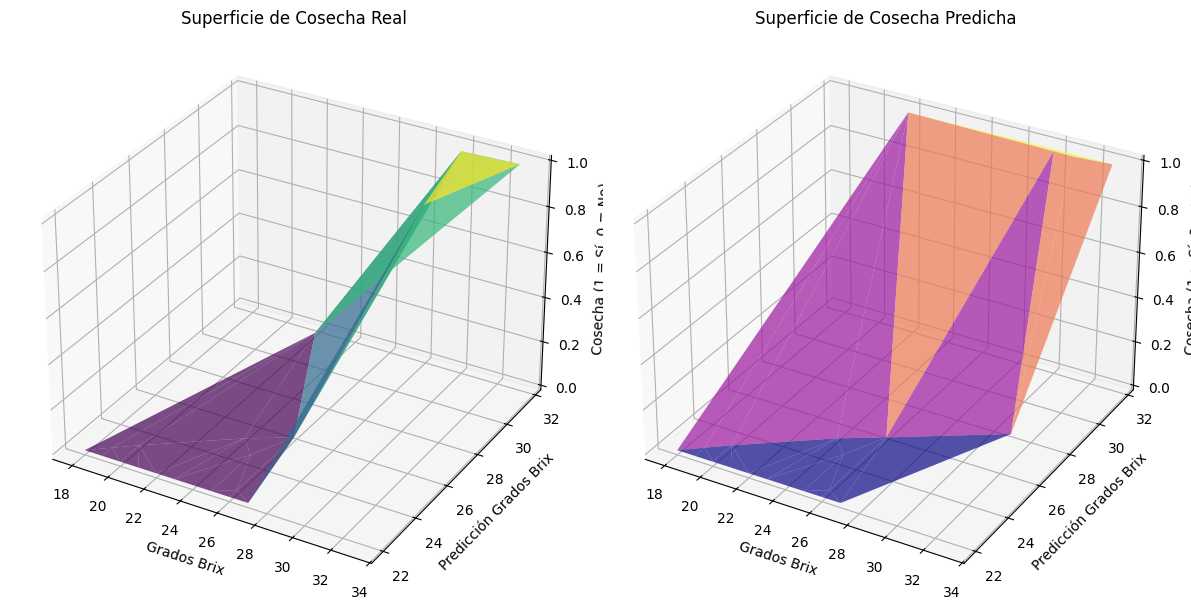

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import os

# ===================== CARGA DEL ARCHIVO =====================
# Subir archivo CSV
uploaded = files.upload()

# Obtener el nombre exacto del archivo subido
file_name = list(uploaded.keys())[0]
print(f"Archivo cargado: {file_name}")

# Leer el archivo CSV
df = pd.read_csv(file_name)

# ===================== VISUALIZAR DATOS =====================
# Mostrar las primeras filas del dataset para verificar las columnas
print("Primeras filas del archivo:")
print(df.head())

# ===================== PREPARAR DATOS =====================
# Extraer variables relevantes
X = df["Grados_Brix"]
Y = df["Predicción Grados Brix Optimizada"]
Z_real = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
Z_pred = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# ===================== GENERAR GRÁFICAS 3D =====================
fig = plt.figure(figsize=(12, 6))

# Gráfico de cosecha real
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(X, Y, Z_real, cmap="viridis", alpha=0.7)
ax1.set_title("Superficie de Cosecha Real")
ax1.set_xlabel("Grados Brix")
ax1.set_ylabel("Predicción Grados Brix")
ax1.set_zlabel("Cosecha (1 = Sí, 0 = No)")

# Gráfico de cosecha optimizada
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(X, Y, Z_pred, cmap="plasma", alpha=0.7)
ax2.set_title("Superficie de Cosecha Predicha")
ax2.set_xlabel("Grados Brix")
ax2.set_ylabel("Predicción Grados Brix")
ax2.set_zlabel("Cosecha (1 = Sí, 0 = No)")

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== CÁLCULO DE MÉTRICAS ADICIONALES =====================
mse = mean_squared_error(y_true, y_pred)


# Evitar división por cero en MRE
epsilon = 1e-10
relative_errors = np.abs((y_true - y_pred) / (y_true + epsilon))
mre = np.mean(relative_errors)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)

# ===================== MOSTRAR MÉTRICAS DE REGRESIÓN / ERROR =====================
print("\n===== MÉTRICAS DE REGRESIÓN / ERROR =====")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Relativo Medio (MRE): {mre:.4f}")



Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf (1).csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trimf (1) (1).csv

Total de muestras: 28
Errores detectados: 2
Tasa de error: 7.14%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 92.86%
Exactitud (Precision): 83.33%
Sensibilidad (Recall): 83.33%
Puntaje F1 (F1-Score): 83.33%

===== MATRIZ DE CONFUSIÓN =====
[[21  1]
 [ 1  5]]

===== MÉTRICAS DE REGRESIÓN / ERROR =====
Error Cuadrático Medio (MSE): 0.0714
Error Relativo Medio (MRE): 357142857.1786


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix_MOD.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir variables de entrada con nuevos umbrales optimizados
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida (Grados Brix)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Verificar si Grados_Brix está correctamente definido
print("Universo de Grados_Brix:", Grados_Brix.universe)

# Aplicar los valores optimizados en funciones de membresía trapezoidales (trapmf)
ALLSKY_KT['bajo'] = fuzz.trapmf(ALLSKY_KT.universe, [0.49, 0.52, 0.55, 0.59])
ALLSKY_KT['medio'] = fuzz.trapmf(ALLSKY_KT.universe, [0.55, 0.60, 0.63, 0.68])
ALLSKY_KT['alto'] = fuzz.trapmf(ALLSKY_KT.universe, [0.63, 0.68, 0.71, 0.73])

QV2M['bajo'] = fuzz.trapmf(QV2M.universe, [8.2, 9.0, 10.0, 11.0])
QV2M['medio'] = fuzz.trapmf(QV2M.universe, [10.0, 11.5, 13.0, 14.0])
QV2M['alto'] = fuzz.trapmf(QV2M.universe, [13.5, 14.0, 15.0, 15.3])

T2MDEW['bajo'] = fuzz.trapmf(T2MDEW.universe, [8.5, 9.5, 11.0, 12.5])
T2MDEW['medio'] = fuzz.trapmf(T2MDEW.universe, [11.0, 13.0, 15.0, 16.5])
T2MDEW['alto'] = fuzz.trapmf(T2MDEW.universe, [15.5, 16.5, 18.0, 18.6])

PRECTOTCORR_SUM['bajo'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [0.4, 20, 50, 100])
PRECTOTCORR_SUM['medio'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [50, 100, 160, 180])
PRECTOTCORR_SUM['alto'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [160, 180, 210, 221.6])

PRECTOTCORR['bajo'] = fuzz.trapmf(PRECTOTCORR.universe, [0.01, 1.0, 2.0, 3.0])
PRECTOTCORR['medio'] = fuzz.trapmf(PRECTOTCORR.universe, [2.5, 3.5, 5.0, 6.0])
PRECTOTCORR['alto'] = fuzz.trapmf(PRECTOTCORR.universe, [5.5, 6.0, 7.0, 7.3])

# Definir funciones de membresía para Grados Brix ajustadas
Grados_Brix['bajo'] = fuzz.trapmf(Grados_Brix.universe, [18, 20, 22, 25])
Grados_Brix['medio'] = fuzz.trapmf(Grados_Brix.universe, [24, 26, 28, 30])
Grados_Brix['alto'] = fuzz.trapmf(Grados_Brix.universe, [28, 30, 34, 36])

# Definir nuevas reglas basadas en los umbrales optimizados
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso optimizado
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
    brix_sim.input['QV2M'] = row['QV2M']
    brix_sim.input['T2MDEW'] = row['T2MDEW']
    brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
    brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']

    brix_sim.compute()

    try:
        predictions_new.append(brix_sim.output['Grados_Brix'])
    except KeyError:
        predictions_new.append(np.nan)
        print(f"Advertencia: No se pudo calcular Grados_Brix en la fila {i}")

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Optimizada"] = predictions_new

# Guardar el archivo con las nuevas predicciones optimizadas
output_file = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trap.csv"
df.to_csv(output_file, index=False)
print("Modelo optimizado ejecutado correctamente. Archivo guardado en:", output_file)


Universo de Grados_Brix: [18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5
 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5
 32.  32.5 33.  33.5 34.  34.5 35.  35.5]
Modelo optimizado ejecutado correctamente. Archivo guardado en: /content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trap.csv


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_trap.csv"  # Asegúrate de que el archivo esté subido en Colab
df = pd.read_csv(file_path)

# Agregar la columna "Cosecha Optimizada" basada en la predicción optimizada de Grados Brix
df["Cosecha Optimizada"] = df["Predicción Grados Brix Optimizada"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Agregar la columna "Cosecha Real" basada en los valores reales de Grados Brix
df["Cosecha Real"] = df["Grados_Brix"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Guardar el archivo con las nuevas columnas
output_path = "/content/POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trap.csv"
df.to_csv(output_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Proporcionar el enlace para descargar el archivo procesado
from google.colab import files
files.download(output_path)


   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016      1.0           5.0   0.673333   8.370000   8.770000   
1  2016      2.0           6.0   0.630000  10.553333  12.063333   
2  2016      3.0           7.0   0.516667  14.836667  18.100000   
3  2016      4.0           8.0   0.616667  12.340000  14.973333   
4  2017      1.0           9.0   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           22   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0           21   

   Predicción Grados Brix Optimizada Cosecha Optimizada Cosecha Real  
0                          21.464025         No Cosecha   No Cosecha  
1                          21.320190         No Cosecha   No Cosecha  
2                          31.804906     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== CÁLCULO DE MÉTRICAS ADICIONALES =====================
mse = mean_squared_error(y_true, y_pred)


# Evitar división por cero en MRE
epsilon = 1e-10
relative_errors = np.abs((y_true - y_pred) / (y_true + epsilon))
mre = np.mean(relative_errors)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)

# ===================== MOSTRAR MÉTRICAS DE REGRESIÓN / ERROR =====================
print("\n===== MÉTRICAS DE REGRESIÓN / ERROR =====")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Relativo Medio (MRE): {mre:.4f}")



Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trap (1).csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_trap (1).csv

Total de muestras: 28
Errores detectados: 1
Tasa de error: 3.57%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 96.43%
Exactitud (Precision): 85.71%
Sensibilidad (Recall): 100.00%
Puntaje F1 (F1-Score): 92.31%

===== MATRIZ DE CONFUSIÓN =====
[[21  1]
 [ 0  6]]

===== MÉTRICAS DE REGRESIÓN / ERROR =====
Error Cuadrático Medio (MSE): 0.0357
Error Relativo Medio (MRE): 357142857.1429


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix_MOD.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir variables de entrada con nuevos umbrales optimizados
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida (Grados Brix)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Función auxiliar para asegurar sigma positivo en gaussmf
def safe_gaussmf(universe, mean, sigma):
    return fuzz.gaussmf(universe, mean, abs(sigma) + 0.01)  # Se añade un pequeño valor para evitar sigma=0

# Aplicar los valores optimizados en funciones de membresía gaussianas (gaussmf)
ALLSKY_KT['bajo'] = safe_gaussmf(ALLSKY_KT.universe, -0.29, 0.64)
ALLSKY_KT['medio'] = safe_gaussmf(ALLSKY_KT.universe, 0.90, 1.22)
ALLSKY_KT['alto'] = safe_gaussmf(ALLSKY_KT.universe, 0.25, 2.73)

QV2M['bajo'] = safe_gaussmf(QV2M.universe, 0.77, 0.81)
QV2M['medio'] = safe_gaussmf(QV2M.universe, -0.40, 0.53)
QV2M['alto'] = safe_gaussmf(QV2M.universe, 0.27, 0.08)

T2MDEW['bajo'] = safe_gaussmf(T2MDEW.universe, 1.45, 0.00)
T2MDEW['medio'] = safe_gaussmf(T2MDEW.universe, -0.99, 0.46)
T2MDEW['alto'] = safe_gaussmf(T2MDEW.universe, 0.08, 3.44)

PRECTOTCORR_SUM['bajo'] = safe_gaussmf(PRECTOTCORR_SUM.universe, 2.28, 0.49)
PRECTOTCORR_SUM['medio'] = safe_gaussmf(PRECTOTCORR_SUM.universe, -0.92, 0.38)
PRECTOTCORR_SUM['alto'] = safe_gaussmf(PRECTOTCORR_SUM.universe, 1.09, 2.01)

PRECTOTCORR['bajo'] = safe_gaussmf(PRECTOTCORR.universe, 0.22, 0.44)
PRECTOTCORR['medio'] = safe_gaussmf(PRECTOTCORR.universe, -2.01, 0.57)
PRECTOTCORR['alto'] = safe_gaussmf(PRECTOTCORR.universe, 0.64, 0.36)

# Definir funciones de membresía para Grados Brix ajustadas
Grados_Brix['bajo'] = safe_gaussmf(Grados_Brix.universe, -0.77, 0.57)
Grados_Brix['medio'] = safe_gaussmf(Grados_Brix.universe, 0.64, 0.36)
Grados_Brix['alto'] = safe_gaussmf(Grados_Brix.universe, 2.20, 0.90)

# Definir nuevas reglas basadas en los umbrales optimizados
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso optimizado
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
    brix_sim.input['QV2M'] = row['QV2M']
    brix_sim.input['T2MDEW'] = row['T2MDEW']
    brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
    brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']

    brix_sim.compute()

    try:
        predictions_new.append(brix_sim.output['Grados_Brix'])
    except KeyError:
        predictions_new.append(np.nan)
        print(f"Advertencia: No se pudo calcular Grados_Brix en la fila {i}")

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Optimizada"] = predictions_new

# Guardar el archivo con las nuevas predicciones optimizadas
output_file = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_gaussmf.csv"
df.to_csv(output_file, index=False)
print("Modelo optimizado ejecutado correctamente. Archivo guardado en:", output_file)


Modelo optimizado ejecutado correctamente. Archivo guardado en: /content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_gaussmf.csv


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Optimized_Brix_Predictions_gaussmf.csv"  # Asegúrate de que el archivo esté subido en Colab
df = pd.read_csv(file_path)

# Agregar la columna "Cosecha Optimizada" basada en la predicción optimizada de Grados Brix
df["Cosecha Optimizada"] = df["Predicción Grados Brix Optimizada"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Agregar la columna "Cosecha Real" basada en los valores reales de Grados Brix
df["Cosecha Real"] = df["Grados_Brix"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Guardar el archivo con las nuevas columnas
output_path = "/content/POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_gaussmf.csv"
df.to_csv(output_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Proporcionar el enlace para descargar el archivo procesado
from google.colab import files
files.download(output_path)


   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016      1.0           5.0   0.673333   8.370000   8.770000   
1  2016      2.0           6.0   0.630000  10.553333  12.063333   
2  2016      3.0           7.0   0.516667  14.836667  18.100000   
3  2016      4.0           8.0   0.616667  12.340000  14.973333   
4  2017      1.0           9.0   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           22   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0           21   

   Predicción Grados Brix Optimizada Cosecha Optimizada Cosecha Real  
0                       7.069148e-50         No Cosecha   No Cosecha  
1                       7.069148e-50         No Cosecha   No Cosecha  
2                       7.069148e-50     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== CÁLCULO DE MÉTRICAS ADICIONALES =====================
mse = mean_squared_error(y_true, y_pred)


# Evitar división por cero en MRE
epsilon = 1e-10
relative_errors = np.abs((y_true - y_pred) / (y_true + epsilon))
mre = np.mean(relative_errors)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)

# ===================== MOSTRAR MÉTRICAS DE REGRESIÓN / ERROR =====================
print("\n===== MÉTRICAS DE REGRESIÓN / ERROR =====")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Relativo Medio (MRE): {mre:.4f}")



Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_gaussmf (1).csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_gaussmf (1).csv

Total de muestras: 28
Errores detectados: 6
Tasa de error: 21.43%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 78.57%
Exactitud (Precision): 100.00%
Sensibilidad (Recall): 0.00%
Puntaje F1 (F1-Score): 0.00%

===== MATRIZ DE CONFUSIÓN =====
[[22  0]
 [ 6  0]]

===== MÉTRICAS DE REGRESIÓN / ERROR =====
Error Cuadrático Medio (MSE): 0.2143
Error Relativo Medio (MRE): 0.2143


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix_MOD.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir variables de entrada con trapmf (trapezoidal)
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida con trimf (triangular)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Aplicar funciones de membresía a las variables de entrada (trapmf)

# ALLSKY_KT
ALLSKY_KT['bajo'] = fuzz.trapmf(ALLSKY_KT.universe, [0.49, 0.52, 0.55, 0.59])
ALLSKY_KT['medio'] = fuzz.trapmf(ALLSKY_KT.universe, [0.55, 0.60, 0.63, 0.68])
ALLSKY_KT['alto'] = fuzz.trapmf(ALLSKY_KT.universe, [0.63, 0.68, 0.71, 0.73])

# QV2M
QV2M['bajo'] = fuzz.trapmf(QV2M.universe, [8.2, 9.0, 10.0, 11.5])
QV2M['medio'] = fuzz.trapmf(QV2M.universe, [10.0, 11.5, 13.0, 14.0])
QV2M['alto'] = fuzz.trapmf(QV2M.universe, [13.5, 14.5, 15.2, 15.3])

# T2MDEW
T2MDEW['bajo'] = fuzz.trapmf(T2MDEW.universe, [8.5, 9.5, 11.0, 12.5])
T2MDEW['medio'] = fuzz.trapmf(T2MDEW.universe, [11.0, 13.0, 15.0, 16.5])
T2MDEW['alto'] = fuzz.trapmf(T2MDEW.universe, [15.5, 16.5, 18.0, 18.6])

# PRECTOTCORR_SUM
PRECTOTCORR_SUM['bajo'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [0.4, 50, 100, 120])
PRECTOTCORR_SUM['medio'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [100, 120, 180, 200])
PRECTOTCORR_SUM['alto'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, [180, 200, 221, 221.6])

# PRECTOTCORR
PRECTOTCORR['bajo'] = fuzz.trapmf(PRECTOTCORR.universe, [0.01, 1.0, 2.0, 3.0])
PRECTOTCORR['medio'] = fuzz.trapmf(PRECTOTCORR.universe, [2.5, 3.5, 5.0, 6.0])
PRECTOTCORR['alto'] = fuzz.trapmf(PRECTOTCORR.universe, [5.5, 6.0, 7.0, 7.3])

# Aplicar funciones de membresía a la variable de salida (trimf)
Grados_Brix['bajo'] = fuzz.trimf(Grados_Brix.universe, [18, 22, 26])
Grados_Brix['medio'] = fuzz.trimf(Grados_Brix.universe, [24, 27, 30])
Grados_Brix['alto'] = fuzz.trimf(Grados_Brix.universe, [28, 32, 35])

# Definir nuevas reglas difusas
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
    brix_sim.input['QV2M'] = row['QV2M']
    brix_sim.input['T2MDEW'] = row['T2MDEW']
    brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
    brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']

    brix_sim.compute()
    predictions_new.append(brix_sim.output['Grados_Brix'])

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Híbrida"] = predictions_new

# Guardar el archivo con las nuevas predicciones
output_file = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions_trimftapmf.csv"
df.to_csv(output_file, index=False)
print("Modelo híbrido con TRAPMF en entradas y TRIMF en salida ejecutado correctamente.")
print("Archivo guardado en:", output_file)


Modelo híbrido con TRAPMF en entradas y TRIMF en salida ejecutado correctamente.
Archivo guardado en: /content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions_trimftapmf.csv


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions_trimftapmf.csv"  # Asegúrate de que el archivo esté subido en Colab
df = pd.read_csv(file_path)

# Agregar la columna "Cosecha Optimizada" basada en la predicción optimizada de Grados Brix
df["Cosecha Optimizada"] = df["Predicción Grados Brix Híbrida"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Agregar la columna "Cosecha Real" basada en los valores reales de Grados Brix
df["Cosecha Real"] = df["Grados_Brix"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Guardar el archivo con las nuevas columnas
output_path = "/content/POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_HYBRID1.csv"
df.to_csv(output_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Proporcionar el enlace para descargar el archivo procesado
from google.colab import files
files.download(output_path)


   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016      1.0           5.0   0.673333   8.370000   8.770000   
1  2016      2.0           6.0   0.630000  10.553333  12.063333   
2  2016      3.0           7.0   0.516667  14.836667  18.100000   
3  2016      4.0           8.0   0.616667  12.340000  14.973333   
4  2017      1.0           9.0   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           22   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0           21   

   Predicción Grados Brix Híbrida Cosecha Optimizada Cosecha Real  
0                       22.000000         No Cosecha   No Cosecha  
1                       22.000000         No Cosecha   No Cosecha  
2                       29.550812            Cosec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== CÁLCULO DE MÉTRICAS ADICIONALES =====================
mse = mean_squared_error(y_true, y_pred)


# Evitar división por cero en MRE
epsilon = 1e-10
relative_errors = np.abs((y_true - y_pred) / (y_true + epsilon))
mre = np.mean(relative_errors)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)

# ===================== MOSTRAR MÉTRICAS DE REGRESIÓN / ERROR =====================
print("\n===== MÉTRICAS DE REGRESIÓN / ERROR =====")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Relativo Medio (MRE): {mre:.4f}")



Saving POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_HYBRID1 (1).csv to POWER_Quarterly_Aggregated_with_Optimized_Brix_Cosecha_HYBRID1 (1) (1).csv

Total de muestras: 28
Errores detectados: 2
Tasa de error: 7.14%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 92.86%
Exactitud (Precision): 83.33%
Sensibilidad (Recall): 83.33%
Puntaje F1 (F1-Score): 83.33%

===== MATRIZ DE CONFUSIÓN =====
[[21  1]
 [ 1  5]]

===== MÉTRICAS DE REGRESIÓN / ERROR =====
Error Cuadrático Medio (MSE): 0.0714
Error Relativo Medio (MRE): 357142857.1786


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import random
from deap import base, creator, tools, algorithms

# Cargar datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix.csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir rangos de variables de entrada y salida
var_ranges = {
    'ALLSKY_KT': (0.49, 0.73),
    'QV2M': (8.2, 15.3),
    'T2MDEW': (8.5, 18.6),
    'PRECTOTCORR_SUM': (0.4, 221.6),
    'PRECTOTCORR': (0.01, 7.3),
    'Grados_Brix': (18, 36)
}

# Función para generar funciones de membresía con restricciones
def generate_fuzzy_sets(params, universe, fm_type):
    fm_type = min(max(int(fm_type), 0), 1)  # Asegurar solo {0, 1}

    # Limitar valores dentro del rango lógico (0.1 - 10.0) y ordenarlos
    values = sorted(min(max(abs(p), 0.1), 10.0) for p in params)

    if fm_type == 0:  # Triangular (trimf)
        return fuzz.trimf(universe, [values[0], values[1], values[2]])
    elif fm_type == 1:  # Trapezoidal (trapmf)
        return fuzz.trapmf(universe, [values[0], values[1], values[2], values[3]])
    else:
        raise ValueError("Tipo de función no válido.")

# Generar individuos con valores restringidos
def generate_individual():
    individual = []
    for i in range(108):
        if i % 6 == 5:  # Cada sexto valor define el tipo de función {0 = trimf, 1 = trapmf}
            individual.append(random.choice([0, 1]))  # Solo 0 o 1
        else:
            individual.append(random.uniform(0.1, 10.0))  # Rango lógico controlado
    return individual

# Eliminar clases previas en DEAP si existen
if "FitnessMax" in creator.__dict__:
    del creator.FitnessMax
if "Individual" in creator.__dict__:
    del creator.Individual

# Definir la clase de aptitud y la clase de individuos en DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Configurar Algoritmo Genético
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.2)  # Reducir el crossover para mayor estabilidad
toolbox.register("mutate", tools.mutGaussian, mu=1.5, sigma=0.5, indpb=0.1)  # Mutación más estable
toolbox.register("select", tools.selTournament, tournsize=3)

# Definir función de evaluación
def evaluate(individual):
    antecedents = {}
    consequent = {}

    idx = 0
    for var in var_ranges.keys():
        fm_type = min(max(int(individual[idx + 5]), 0), 1)  # Asegurar solo {0,1}

        if var != 'Grados_Brix':  # Variables de entrada
            antecedents[var] = ctrl.Antecedent(np.linspace(*var_ranges[var], 24), var)
            universe = antecedents[var].universe
            antecedents[var]['bajo'] = generate_fuzzy_sets(individual[idx:idx+6], universe, fm_type)
            antecedents[var]['medio'] = generate_fuzzy_sets(individual[idx+6:idx+12], universe, fm_type)
            antecedents[var]['alto'] = generate_fuzzy_sets(individual[idx+12:idx+18], universe, fm_type)
            idx += 18
        else:  # Variable de salida (siempre TRIMF)
            consequent[var] = ctrl.Consequent(np.linspace(*var_ranges[var], 24), var)
            universe = consequent[var].universe
            consequent[var]['bajo'] = generate_fuzzy_sets(individual[idx:idx+6], universe, 0)
            consequent[var]['medio'] = generate_fuzzy_sets(individual[idx+6:idx+12], universe, 0)
            consequent[var]['alto'] = generate_fuzzy_sets(individual[idx+12:idx+18], universe, 0)
            idx += 18

    # Crear sistema difuso y definir reglas
    try:
        rule1 = ctrl.Rule(antecedents['ALLSKY_KT']['alto'] & antecedents['QV2M']['bajo'], consequent['Grados_Brix']['bajo'])
        rule2 = ctrl.Rule(antecedents['ALLSKY_KT']['medio'] & antecedents['QV2M']['medio'], consequent['Grados_Brix']['medio'])
        rule3 = ctrl.Rule(antecedents['ALLSKY_KT']['bajo'] & antecedents['QV2M']['alto'], consequent['Grados_Brix']['alto'])
    except KeyError as e:
        print(f"Error en las reglas: {e}")
        return (0,)

    brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

    # Evaluar el modelo con los datos reales
    predictions = []
    for _, row in df.iterrows():
        try:
            for var in antecedents.keys():
                if var in row:
                    brix_sim.input[var] = row[var]

            brix_sim.compute()

            if 'Grados_Brix' in brix_sim.output:
                predictions.append(brix_sim.output['Grados_Brix'])
            else:
                predictions.append(np.nan)

        except Exception as e:
            predictions.append(np.nan)

    # Calcular error MSE evitando `NaN`
    mse = np.nanmean((df['Grados_Brix'] - np.nan_to_num(np.array(predictions), nan=25)) ** 2)
    return (1 / mse,) if mse > 0 else (0,)

# Registrar evaluación en toolbox
toolbox.register("evaluate", evaluate)

# Ejecutar Algoritmo Genético
population = toolbox.population(n=50)
NGEN = 30
CXPB = 0.6
MUTPB = 0.2

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit if fit[0] > 0 else (0,)

    population = toolbox.select(offspring, k=len(population))

best_ind = tools.selBest(population, k=1)[0]
print("Mejor configuración encontrada:", best_ind)


Mejor configuración encontrada: [5.703098146068296, 8.573488786613726, 6.820033588187994, 5.266525480338376, 4.03599469256133, 2.6896580145483777, 3.442807140664848, 5.147040993951906, 8.207312313033764, 5.686909700164732, 6.362333891805683, 4.499429195488098, 5.9615752893699785, 7.650894241063838, 7.7653892965625175, 8.372866585920798, 6.178854177047086, 1.8878810856317916, 15.231399254294187, 6.468006796390763, 8.719799188133264, 4.859166310724555, 7.803967892561636, 1.293761503776929, 5.699978803480191, 4.942843041999382, 7.088755492342294, 4.774413193631811, 7.597345652802855, 1.4366446781731508, 9.025431300367504, 4.398323611735104, 6.456835169788479, 10.47070362158616, 6.03214318597726, 5.988346044587953, 7.713544992470097, 6.619429944223743, 7.074013293996545, 6.74269792100027, 6.310884050843413, 0.6262735126837368, 6.362179091804892, 4.501621280477588, 5.819482365485262, 8.192743497562471, 4.929389054238183, 1.336875516528311, 5.367371299990379, 1.9908890444268175, 6.1235409980

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Cargar el archivo con los datos
file_path = "/content/POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix (2).csv"
df = pd.read_csv(file_path)

# Renombrar columna para evitar errores
df.rename(columns={'Grados Brix': 'Grados_Brix'}, inplace=True)

# Definir variables de entrada con trapmf (trapezoidal)
ALLSKY_KT = ctrl.Antecedent(np.arange(0.49, 0.73, 0.01), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.arange(8.2, 15.3, 0.1), 'QV2M')
T2MDEW = ctrl.Antecedent(np.arange(8.5, 18.6, 0.1), 'T2MDEW')
PRECTOTCORR_SUM = ctrl.Antecedent(np.arange(0.4, 221.6, 1), 'PRECTOTCORR_SUM')
PRECTOTCORR = ctrl.Antecedent(np.arange(0.01, 7.3, 0.1), 'PRECTOTCORR')

# Definir la variable de salida con trimf (triangular)
Grados_Brix = ctrl.Consequent(np.arange(18, 36, 0.5), 'Grados_Brix')

# Función para asegurar orden correcto en trapmf
def ordenar_trapmf(values):
    return sorted(values)

# Aplicar funciones de membresía a las variables de entrada (trapmf)

# ALLSKY_KT
ALLSKY_KT['bajo'] = fuzz.trapmf(ALLSKY_KT.universe, ordenar_trapmf([0.49, 0.52, 0.55, 0.59]))
ALLSKY_KT['medio'] = fuzz.trapmf(ALLSKY_KT.universe, ordenar_trapmf([0.55, 0.60, 0.63, 0.68]))
ALLSKY_KT['alto'] = fuzz.trapmf(ALLSKY_KT.universe, ordenar_trapmf([0.63, 0.68, 0.71, 0.73]))

# QV2M
QV2M['bajo'] = fuzz.trapmf(QV2M.universe, ordenar_trapmf([8.2, 9.0, 10.0, 11.5]))
QV2M['medio'] = fuzz.trapmf(QV2M.universe, ordenar_trapmf([10.0, 11.5, 13.0, 14.0]))
QV2M['alto'] = fuzz.trapmf(QV2M.universe, ordenar_trapmf([13.5, 14.5, 15.2, 15.3]))

# T2MDEW
T2MDEW['bajo'] = fuzz.trapmf(T2MDEW.universe, ordenar_trapmf([8.5, 9.5, 11.0, 12.5]))
T2MDEW['medio'] = fuzz.trapmf(T2MDEW.universe, ordenar_trapmf([11.0, 13.0, 15.0, 16.5]))
T2MDEW['alto'] = fuzz.trapmf(T2MDEW.universe, ordenar_trapmf([15.5, 16.5, 18.0, 18.6]))

# PRECTOTCORR_SUM
PRECTOTCORR_SUM['bajo'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, ordenar_trapmf([0.4, 50, 100, 120]))
PRECTOTCORR_SUM['medio'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, ordenar_trapmf([100, 120, 180, 200]))
PRECTOTCORR_SUM['alto'] = fuzz.trapmf(PRECTOTCORR_SUM.universe, ordenar_trapmf([180, 200, 221, 221.6]))

# PRECTOTCORR
PRECTOTCORR['bajo'] = fuzz.trapmf(PRECTOTCORR.universe, ordenar_trapmf([0.01, 1.0, 2.0, 3.0]))
PRECTOTCORR['medio'] = fuzz.trapmf(PRECTOTCORR.universe, ordenar_trapmf([2.5, 3.5, 5.0, 6.0]))
PRECTOTCORR['alto'] = fuzz.trapmf(PRECTOTCORR.universe, ordenar_trapmf([5.5, 6.0, 7.0, 7.3]))

# Aplicar funciones de membresía a la variable de salida (trimf)
Grados_Brix['bajo'] = fuzz.trimf(Grados_Brix.universe, [18, 22, 26])
Grados_Brix['medio'] = fuzz.trimf(Grados_Brix.universe, [24, 27, 30])
Grados_Brix['alto'] = fuzz.trimf(Grados_Brix.universe, [28, 32, 35])

# Definir nuevas reglas difusas
rule1 = ctrl.Rule(ALLSKY_KT['alto'] & QV2M['bajo'] & T2MDEW['bajo'] & PRECTOTCORR_SUM['bajo'], Grados_Brix['bajo'])
rule2 = ctrl.Rule(ALLSKY_KT['medio'] & QV2M['medio'] & T2MDEW['medio'] & PRECTOTCORR_SUM['medio'], Grados_Brix['medio'])
rule3 = ctrl.Rule(ALLSKY_KT['bajo'] & QV2M['alto'] & T2MDEW['alto'] & PRECTOTCORR_SUM['alto'], Grados_Brix['alto'])
rule4 = ctrl.Rule(PRECTOTCORR_SUM['alto'] | PRECTOTCORR['alto'], Grados_Brix['alto'])
rule5 = ctrl.Rule(PRECTOTCORR_SUM['medio'] | PRECTOTCORR['medio'], Grados_Brix['medio'])
rule6 = ctrl.Rule(PRECTOTCORR_SUM['bajo'] | PRECTOTCORR['bajo'], Grados_Brix['bajo'])

# Crear el sistema de control difuso
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# Aplicar el nuevo sistema difuso a cada fila del dataset
predictions_new = []
for i, row in df.iterrows():
    try:
        brix_sim.input['ALLSKY_KT'] = row['ALLSKY_KT']
        brix_sim.input['QV2M'] = row['QV2M']
        brix_sim.input['T2MDEW'] = row['T2MDEW']
        brix_sim.input['PRECTOTCORR_SUM'] = row['PRECTOTCORR_SUM']
        brix_sim.input['PRECTOTCORR'] = row['PRECTOTCORR']

        brix_sim.compute()
        predictions_new.append(brix_sim.output['Grados_Brix'])
    except Exception as e:
        print(f"Error en fila {i}: {e}")
        predictions_new.append(np.nan)  # Evita que el código se detenga

# Agregar la nueva predicción al dataframe
df["Predicción Grados Brix Híbrida"] = predictions_new

# Guardar el archivo con las nuevas predicciones
output_file = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions3.0.csv"
df.to_csv(output_file, index=False)

print("Modelo híbrido con TRAPMF en entradas y TRIMF en salida ejecutado correctamente.")
print("Archivo guardado en:", output_file)


Modelo híbrido con TRAPMF en entradas y TRIMF en salida ejecutado correctamente.
Archivo guardado en: /content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions3.0.csv


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Predictions3.0.csv"  # Asegúrate de que el archivo esté subido en Colab
df = pd.read_csv(file_path)

# Agregar la columna "Cosecha Optimizada" basada en la predicción optimizada de Grados Brix
df["Cosecha Optimizada"] = df["Predicción Grados Brix Híbrida"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Agregar la columna "Cosecha Real" basada en los valores reales de Grados Brix
df["Cosecha Real"] = df["Grados_Brix"].apply(
    lambda x: "Cosecha" if x >= 28.0 else "No Cosecha"
)

# Guardar el archivo con las nuevas columnas
output_path = "/content/drive/MyDrive/POWER_Quarterly_Aggregated_with_Hybrid_Brix_Prediction_COSECHA3.0.csv"
df.to_csv(output_path, index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Proporcionar el enlace para descargar el archivo procesado
from google.colab import files
files.download(output_path)


   YEAR  Quarter  Trimester_ID  ALLSKY_KT       QV2M     T2MDEW  \
0  2016        1             5   0.673333   8.370000   8.770000   
1  2016        2             6   0.630000  10.553333  12.063333   
2  2016        3             7   0.516667  14.836667  18.100000   
3  2016        4             8   0.616667  12.340000  14.973333   
4  2017        1             9   0.690000   8.383333   8.996667   

   PRECTOTCORR_SUM  PRECTOTCORR  Cluster  Grados_Brix  \
0         3.273333     0.106667        0           22   
1        49.823333     1.653333        0           26   
2       182.890000     5.966667        1           28   
3        35.170000     1.150000        0           25   
4         3.013333     0.096667        0           21   

   Predicción Grados Brix Híbrida Cosecha Optimizada Cosecha Real  
0                       22.000000         No Cosecha   No Cosecha  
1                       22.000000         No Cosecha   No Cosecha  
2                       29.550812            Cosec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir las variables de categóricas a numéricas (0 y 1)
df["Cosecha Real Num"] = df["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df["Cosecha Optimizada Num"] = df["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Extraer valores reales y predichos
y_true = df["Cosecha Real Num"].values
y_pred = df["Cosecha Optimizada Num"].values

# ===================== VERIFICACIÓN DE ERRORES =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

# ===================== CÁLCULO DE MÉTRICAS PARA DATOS BINARIOS =====================
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== MOSTRAR RESULTADOS =====================
print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

# ===================== MOSTRAR MATRIZ DE CONFUSIÓN =====================
print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# ===================== CONFIGURACIÓN DEL ENTORNO =====================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files

# ===================== CARGA DEL ARCHIVO =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== PREPARAR DATOS =====================
# Convertir etiqueta de grados Brix a clases binarias
df["Cosecha"] = df["Grados Brix"].apply(lambda x: "Cosecha" if x >= 27 else "No cosecha")
df["Cosecha Binaria"] = df["Cosecha"].apply(lambda x: 1 if x == "Cosecha" else 0)

# Variables de entrada
features = ['ALLSKY_KT', 'QV2M', 'T2MDEW', 'PRECTOTCORR_SUM', 'PRECTOTCORR']
X = df[features].values
y = df["Cosecha Binaria"].values

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================== ENTRENAMIENTO DEL MODELO =====================
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# ===================== PREDICCIÓN Y EVALUACIÓN =====================
y_pred = mlp.predict(X_test_scaled)

# Verificación de errores
errores = np.sum(y_test != y_pred)
total_muestras = len(y_test)
error_rate = (errores / total_muestras) * 100

# ===================== CÁLCULO DE MÉTRICAS BINARIAS =====================
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, zero_division=1) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# ===================== RESULTADOS =====================
print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)


Saving POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix (3).csv to POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix (3) (1).csv

Total de muestras: 6
Errores detectados: 1
Tasa de error: 16.67%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 83.33%
Exactitud (Precision): 50.00%
Sensibilidad (Recall): 100.00%
Puntaje F1 (F1-Score): 66.67%

===== MATRIZ DE CONFUSIÓN =====
[[4 1]
 [0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ModuleNotFoundError: No module named 'skfuzzy'

In [ ]:
# ===================== INSTALAR DEPENDENCIAS =====================
!pip install -q scikit-fuzzy

# ===================== IMPORTAR LIBRERÍAS =====================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import files
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# ===================== CARGAR CSV =====================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ===================== VARIABLES DE ENTRADA Y SALIDA =====================
features = ['ALLSKY_KT', 'QV2M', 'T2MDEW', 'PRECTOTCORR_SUM', 'PRECTOTCORR']
target = 'Grados Brix'

X = df[features].values
y = df[target].values

# ===================== DIVISIÓN DE DATOS =====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===================== CREAR UNIVERSOS DIFUSOS =====================
ALLSKY_KT = ctrl.Antecedent(np.linspace(df['ALLSKY_KT'].min(), df['ALLSKY_KT'].max(), 100), 'ALLSKY_KT')
QV2M = ctrl.Antecedent(np.linspace(df['QV2M'].min(), df['QV2M'].max(), 100), 'QV2M')
T2MDEW = ctrl.Antecedent(np.linspace(df['T2MDEW'].min(), df['T2MDEW'].max(), 100), 'T2MDEW')
PREC_SUM = ctrl.Antecedent(np.linspace(df['PRECTOTCORR_SUM'].min(), df['PRECTOTCORR_SUM'].max(), 100), 'PREC_SUM')
PREC_AVG = ctrl.Antecedent(np.linspace(df['PRECTOTCORR'].min(), df['PRECTOTCORR'].max(), 100), 'PREC_AVG')
BRIX = ctrl.Consequent(np.linspace(df['Grados Brix'].min(), df['Grados Brix'].max(), 100), 'BRIX')

# ===================== FUNCIONES DE MEMBRESÍA =====================
for var in [ALLSKY_KT, QV2M, T2MDEW, PREC_SUM, PREC_AVG]:
    var['low'] = fuzz.trimf(var.universe, [var.universe.min(), var.universe.min(), np.median(var.universe)])
    var['medium'] = fuzz.trimf(var.universe, [var.universe.min(), np.median(var.universe), var.universe.max()])
    var['high'] = fuzz.trimf(var.universe, [np.median(var.universe), var.universe.max(), var.universe.max()])

BRIX['low'] = fuzz.trimf(BRIX.universe, [BRIX.universe.min(), BRIX.universe.min(), np.median(BRIX.universe)])
BRIX['medium'] = fuzz.trimf(BRIX.universe, [BRIX.universe.min(), np.median(BRIX.universe), BRIX.universe.max()])
BRIX['high'] = fuzz.trimf(BRIX.universe, [np.median(BRIX.universe), BRIX.universe.max(), BRIX.universe.max()])

# ===================== DEFINIR REGLAS DIFUSAS =====================
rule1 = ctrl.Rule(ALLSKY_KT['high'] & QV2M['low'] & T2MDEW['low'], BRIX['high'])
rule2 = ctrl.Rule(PREC_SUM['high'] | PREC_AVG['high'], BRIX['low'])
rule3 = ctrl.Rule(ALLSKY_KT['medium'] & QV2M['medium'] & PREC_SUM['medium'], BRIX['medium'])

# ===================== SISTEMA DIFUSO =====================
brix_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
brix_sim = ctrl.ControlSystemSimulation(brix_ctrl)

# ===================== PREDICCIONES DIFUSAS =====================
predicciones_brix = []
for i in range(len(X_test)):
    brix_sim.input['ALLSKY_KT'] = X_test[i][0]
    brix_sim.input['QV2M'] = X_test[i][1]
    brix_sim.input['T2MDEW'] = X_test[i][2]
    brix_sim.input['PREC_SUM'] = X_test[i][3]
    brix_sim.input['PREC_AVG'] = X_test[i][4]
    try:
        brix_sim.compute()
        predicciones_brix.append(brix_sim.output['BRIX'])
    except:
        predicciones_brix.append(np.nan)

# ===================== CLASIFICAR COMO "COSECHA" (>=27°Brix) =====================
df_resultados = pd.DataFrame({
    "Cosecha Real": ["Cosecha" if val >= 27 else "No cosecha" for val in y_test],
    "Grado Brix Predicho": predicciones_brix
})
df_resultados = df_resultados.dropna()
df_resultados["Cosecha Optimizada"] = df_resultados["Grado Brix Predicho"].apply(lambda x: "Cosecha" if x >= 27 else "No cosecha")

# ===================== CONVERTIR A FORMATO BINARIO =====================
df_resultados["Cosecha Real Num"] = df_resultados["Cosecha Real"].apply(lambda x: 1 if x == "Cosecha" else 0)
df_resultados["Cosecha Optimizada Num"] = df_resultados["Cosecha Optimizada"].apply(lambda x: 1 if x == "Cosecha" else 0)

y_true = df_resultados["Cosecha Real Num"].values
y_pred = df_resultados["Cosecha Optimizada Num"].values

# ===================== MÉTRICAS =====================
errores = np.sum(y_true != y_pred)
total_muestras = len(y_true)
error_rate = (errores / total_muestras) * 100

accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, zero_division=1) * 100
recall = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
conf_matrix = confusion_matrix(y_true, y_pred)

# ===================== RESULTADOS =====================
print(f"\nTotal de muestras: {total_muestras}")
print(f"Errores detectados: {errores}")
print(f"Tasa de error: {error_rate:.2f}%")

print("\n===== MÉTRICAS DE CLASIFICACIÓN =====")
print(f"Precisión (Accuracy): {accuracy:.2f}%")
print(f"Exactitud (Precision): {precision:.2f}%")
print(f"Sensibilidad (Recall): {recall:.2f}%")
print(f"Puntaje F1 (F1-Score): {f1:.2f}%")

print("\n===== MATRIZ DE CONFUSIÓN =====")
print(conf_matrix)


Saving POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix (3).csv to POWER_Quarterly_Aggregated_with_Top5_Clusters_Brix (3) (3).csv

Total de muestras: 6
Errores detectados: 2
Tasa de error: 33.33%

===== MÉTRICAS DE CLASIFICACIÓN =====
Precisión (Accuracy): 66.67%
Exactitud (Precision): 33.33%
Sensibilidad (Recall): 100.00%
Puntaje F1 (F1-Score): 50.00%

===== MATRIZ DE CONFUSIÓN =====
[[3 2]
 [0 1]]
